In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [3]:
df = pd.read_csv("/content/drive/MyDrive/csvFiles/heart-disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.index

RangeIndex(start=0, stop=303, step=1)

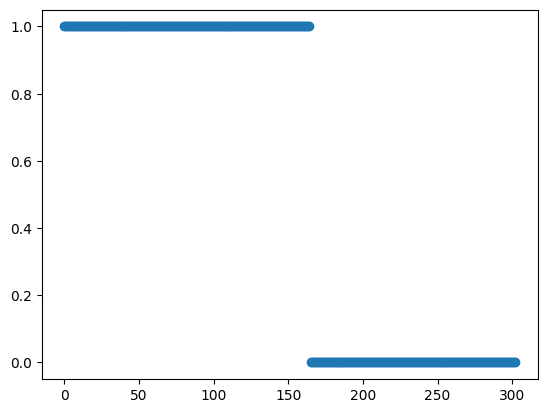

In [6]:
plt.scatter(df.index, df["target"].values);

In [7]:
X = df.drop("target", axis=1)
y = df.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
rs = RobustScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)

In [10]:
X_test = rs.transform(X_test)

In [11]:
adam = Adam(learning_rate=0.002)
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

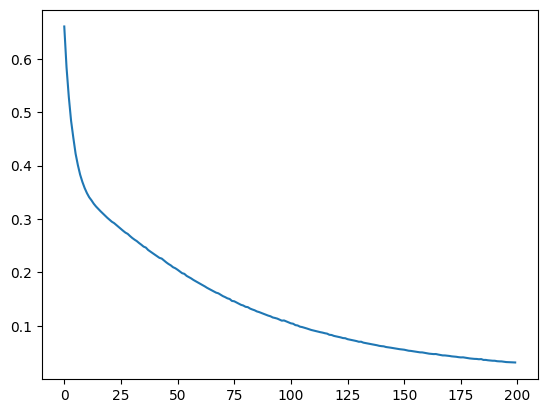

In [12]:
plt.plot(history.history["loss"]);

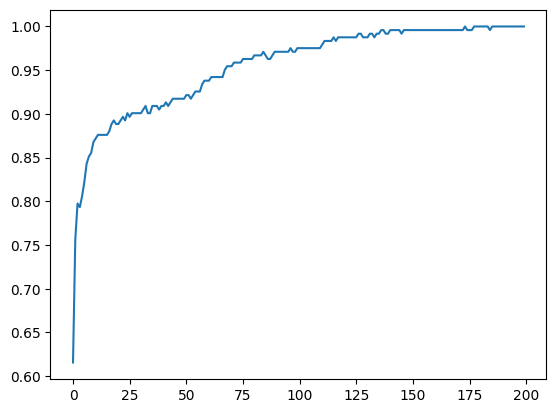

In [13]:
plt.plot(history.history["accuracy"])

In [14]:
y_preds = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [15]:
y_preds = np.where(y_preds >= 0.5, 1, 0)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 2, 32]])